<a href="https://colab.research.google.com/github/rishavkumar33/usc_sipi_dataset_imageRecognizer_with_resnet34_using_Fastai/blob/main/usc_sipi_dataset_imageRecognizer_with_resnet34_using_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from sklearn.metrics import recall_score, f1_score, confusion_matrix, auc, roc_curve, roc_auc_score, cohen_kappa_score
from fastai.callback.tracker import SaveModelCallback
from fastai.metrics import accuracy, Recall, F1Score, error_rate
from fastai.vision import *
from fastai.vision.utils import verify_images
from fastai.vision.all import *

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:

import fastai
print(fastai.__version__)

2.7.13


link to download usc sipi dataset https://drive.google.com/drive/folders/1_7Eerimn4AvTwnDLqbTeiKfz3BqZv8x-?usp=sharing

In [ ]:

bs = 64  # batch size:
sz = 224  # image size
PATH = '/content/drive/MyDrive/usc_sipi/'

In [ ]:

classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d)
print("There are ", len(classes), "classes:\n", classes)

for c in classes:
    for filename in os.listdir(os.path.join(PATH, c)):
        if not filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.tiff')):
            os.remove(os.path.join(PATH, c, filename))

There are  4 classes:
 ['aerials', 'misc', 'textures', 'sequences']


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


There are 168 training images and 41 validation images.


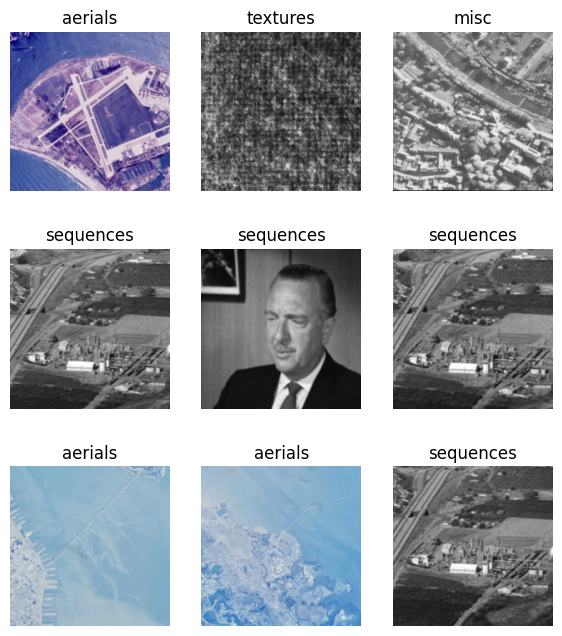

In [ ]:

data = ImageDataLoaders.from_folder(PATH, train=".", valid_pct=0.2, bs=bs, item_tfms=Resize(sz))

print("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images.")
data.show_batch(figsize=(7, 8))

In [ ]:

learn = vision_learner(data, models.resnet34, metrics=[accuracy,Recall(average='macro'), F1Score(average='macro'), error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 57.5MB/s]


In [ ]:

learn.fit_one_cycle(10, lr_max=slice(1e-3, 1e-2),)

epoch,train_loss,valid_loss,accuracy,recall_score,f1_score,error_rate,time
0,2.097808,2.311608,0.414634,0.509091,0.381988,0.585366,01:26
1,1.212552,1.419394,0.804878,0.860606,0.807971,0.195122,00:56
2,0.812330,0.844579,0.853659,0.893939,0.858974,0.146341,00:55
3,0.631754,0.617777,0.902439,0.927273,0.899892,0.097561,00:51
4,0.507777,0.531629,0.926829,0.943939,0.928683,0.073171,00:53
5,0.419523,0.452212,0.926829,0.943939,0.928683,0.073171,00:55
6,0.359814,0.426214,0.951219,0.960606,0.948701,0.048781,00:52
7,0.327679,0.407927,0.975610,0.977273,0.980031,0.024390,00:55
8,0.294163,0.393351,0.975610,0.977273,0.980031,0.024390,00:52
9,0.261861,0.388162,0.975610,0.977273,0.980031,0.024390,00:53


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_co

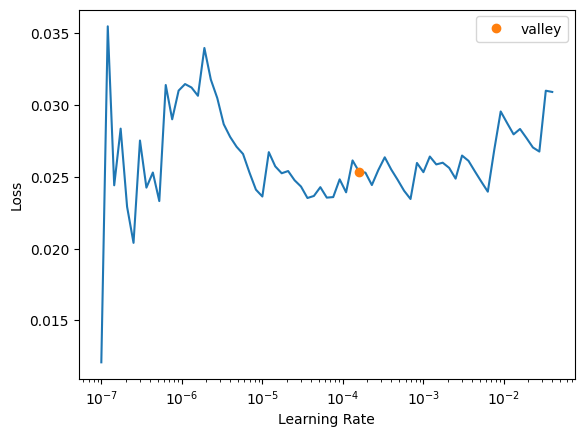

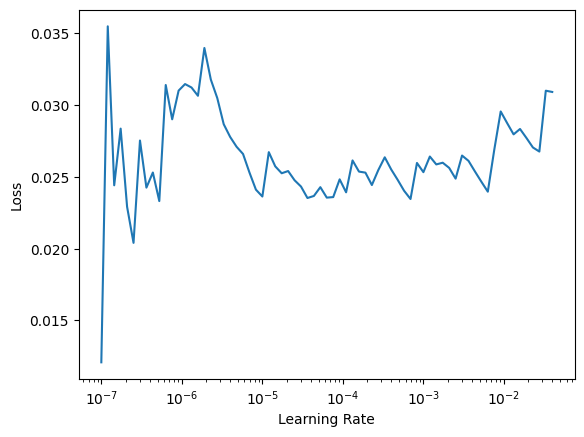

In [ ]:
#  optimal learning rate
learn.model
learn.lr_find()
learn.recorder.plot_lr_find()


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


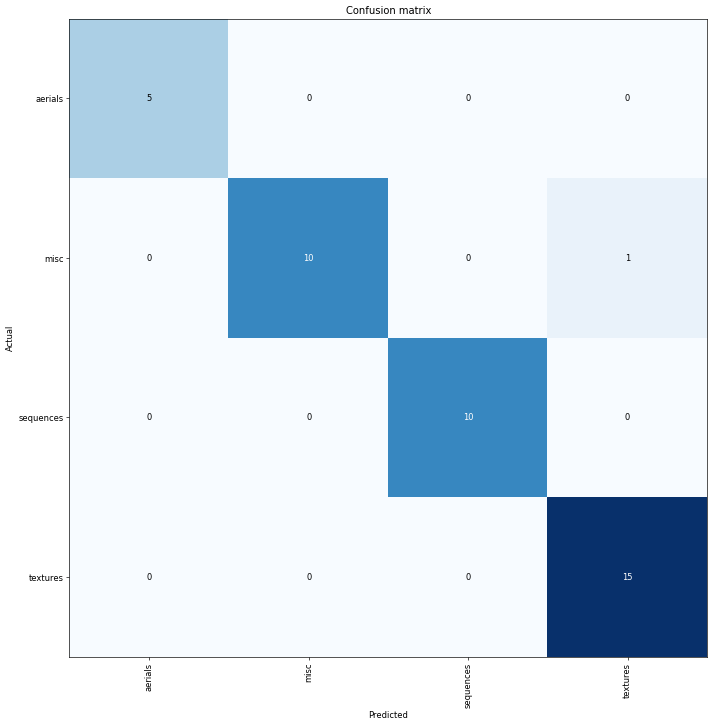

In [ ]:
# confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


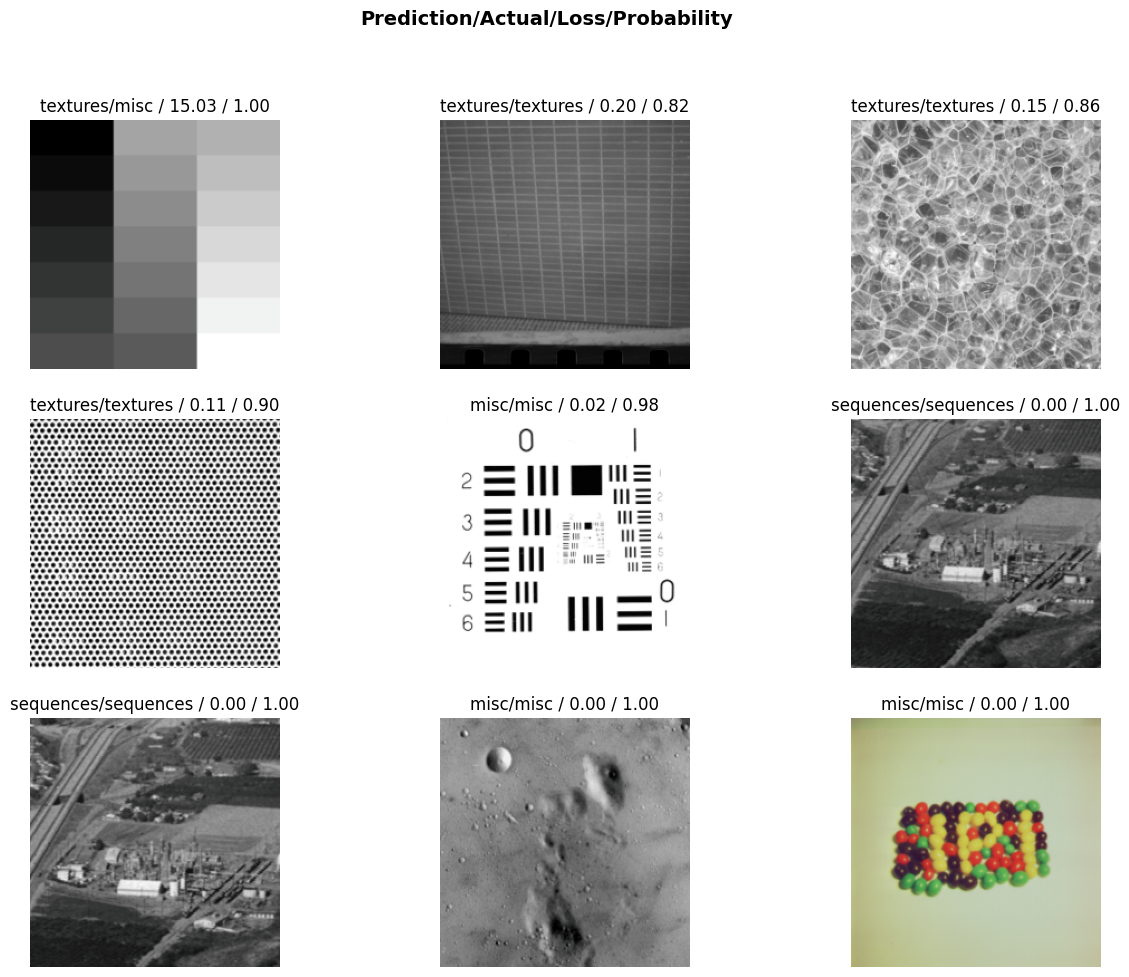

In [ ]:
# Plot top losses
interp.plot_top_losses(9, figsize=(15, 11))

# Additional metrics
predictions, targets = learn.get_preds()

# Recall
recall = recall_score(targets, predictions.argmax(dim=1), average='weighted')

# F1 Score
f1 = f1_score(targets, predictions.argmax(dim=1), average='weighted')

# Specificity
cm = confusion_matrix(targets, predictions.argmax(dim=1))
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Area under the curve (AUC)
#from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(targets.cpu().numpy(), predictions.cpu().numpy(), multi_class='ovr')


# Cohen's Kappa
kappa = cohen_kappa_score(targets, predictions.argmax(dim=1))

In [ ]:
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

Recall: 0.9756
F1 Score: 0.9754
Specificity: 1.0000
AUC: 0.9875
Cohen's Kappa: 0.9660
